In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from grid import TriangleGrid

In [3]:
def valid(n, coord):
    return np.sum(np.abs(coord)) <= 2*(n-1)+1

def get_board(n,coord):
    if valid(n, coord):
        return coord
    else:
        coord = np.array(coord)
        centers = np.array([(2*n, -n,-n), (-2*n, n, n), (-n, 2*n, -n), (n, -2*n, n), (-n,-n,2*n), (n,n,-2*n)])
        
        for c in centers:
            if valid(n, coord-c):
                return coord-c
        
        print("Center not found")
        return None


def get_xy(dirs, mtx, c):
    n_coords = [c+d for d in dirs if np.sum(c+d)==0]
    n_coords = l*np.matmul(mtx, np.array(n_coords)[:,:2].T)

    x,y = n_coords[0,:], n_coords[1,:]
    
    return x,y

def plot_hexagon(t, l=1.0):
    mtx = np.array([[1,0.5], [0,-np.sqrt(3)/2]])
    dirs = np.array([(1,0,0), (0,1,0), (0,0,1), (-1,0,0), (0,-1,0), (0,0,-1)])
    
    plt.figure(figsize=(8,8))
    plt.gca().set_aspect('equal')
    for c in t.all_points:
        n_coords = [c+d for d in dirs if np.sum(c+d)==0]
        n_coords = l*np.matmul(mtx, np.array(n_coords)[:,:2].T)
        
        x,y = n_coords[0,:], n_coords[1,:]
        plt.fill(x,y, edgecolor='b', facecolor='none')

def plot_hexagon2(t, l, center=None, paths=None, shift=[0,0,0]):
    mtx = np.array([[1,0.5], [0,-np.sqrt(3)/2]])
    dirs = np.array([(1,0,0), (0,1,0), (0,0,1), (-1,0,0), (0,-1,0), (0,0,-1)])
    
    plt.figure(figsize=(8,8))
    plt.gca().set_aspect('equal')
    for c in t.all_points:
        x,y = get_xy(dirs, mtx, c)
        if tuple(center) == tuple(c):
            plt.fill(x,y, edgecolor='b', facecolor='r', alpha=1.0)
        elif tuple(c) == tuple(np.array(center)+np.array(shift)):
            plt.fill(x,y, edgecolor='b', facecolor='b', alpha=1.0)
        else:
            plt.fill(x,y, edgecolor='b', facecolor='none', alpha = 0.3)

    for neigh in paths:
        neigh0 = neigh
        neigh = np.array(neigh)+np.array(shift)

        neigh = get_board(t.n, neigh)
        if len(neigh)==0:
            print(neigh)
        else:
            if not valid(t.n, neigh0):
                print(neigh0, '==>', neigh)
            # Does not work...
            #delta = np.array([-0.5,np.tan(np.pi/3)/6])
            #c1 = l*(np.matmul(mtx, center[:2])+delta)
            #c2 = l*(np.matmul(mtx, neigh[:2])+delta)
            #plt.plot([c1[0], c2[0]], [c1[1], c2[1]])
            x2,y2 = get_xy(dirs, mtx, neigh)
            plt.fill(x2,y2, edgecolor='b', facecolor='y', alpha=1.0)

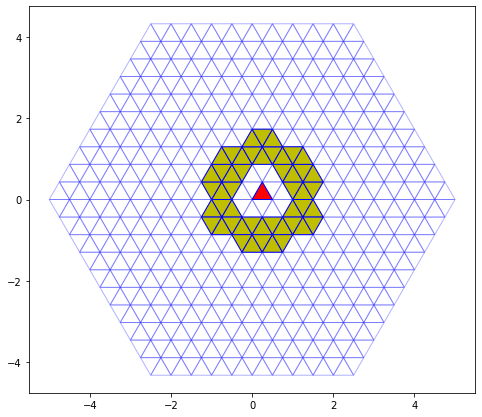

In [16]:
l = 0.5
center = [1,0,0]
t3 = TriangleGrid(10)
patt = t3.get_pattern(l, center = center)

plot_hexagon2(t3, l, [1,0, 0], patt)

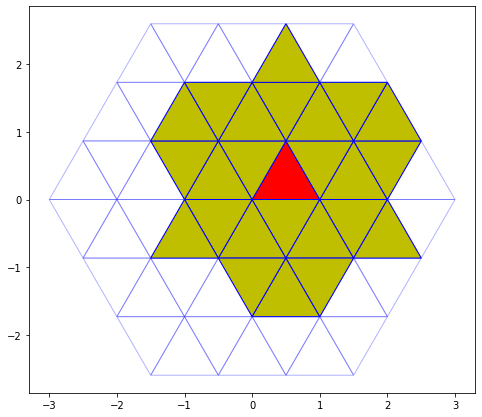

In [5]:
l = 1.0
center = [1,0,0]
t3 = TriangleGrid(3)
paths = t3.get_pattern(l, center = center)

plot_hexagon2(t3, l, [1,0, 0], paths, [0,0,0])


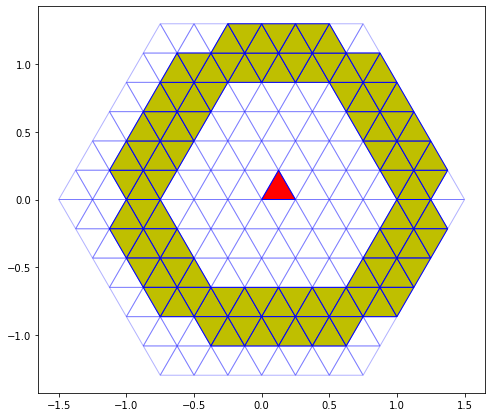

In [6]:
l = 0.25
center = [1,0,0]
t3 = TriangleGrid(6)
paths = t3.get_pattern(l, center = center)

plot_hexagon2(t3, l, [1,0, 0], paths)

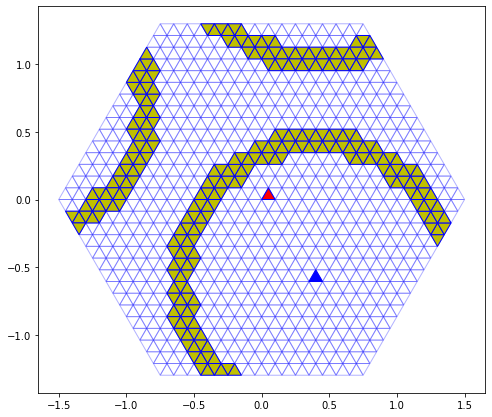

[(-9, 1, 9), (-9, 0, 10), (-10, 0, 9), (-9, -1, 9), (-9, 2, 8), (-10, 1, 8), (-8, -1, 10), (-8, -2, 9), (-10, 2, 7), (-7, -2, 10)]


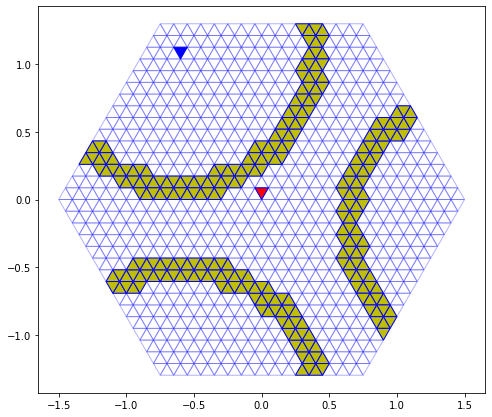

[(10, 0, -9), (9, 1, -9), (9, 0, -10), (8, 1, -10), (2, 8, -9), (2, 7, -10), (1, 9, -9), (1, 8, -10), (-9, 1, 9), (-9, 0, 10)]


In [38]:
l = 0.1
t3 = TriangleGrid(15)
paths = t3.get_pattern(l, center = [1,0,0])
plot_hexagon2(t3, l, [1,0,0], paths, shift=[0,7,-7])
plt.show()
print(paths[:10])

paths = t3.get_pattern(l, center = [0,-1,0])
plot_hexagon2(t3, l, [0,-1,0], paths, shift=[0,-12,12])
plt.show()

print(paths[:10])

Grid generated
Paths


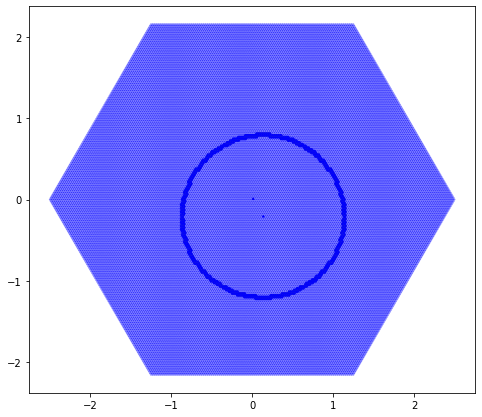

CPU times: user 1min 55s, sys: 882 ms, total: 1min 56s
Wall time: 1min 56s


In [23]:
%%time
l = 0.025
t3 = TriangleGrid(100)
print("Grid generated")
paths = t3.get_pattern(l, center = [1,0,0])
print("Paths")
plot_hexagon2(t3, l, [1,0,0], paths, shift=[0,10,-10])
plt.show()

In [28]:
NN = 1234

ind= 54*NN*NN+89*NN+12

a = ind//(NN*NN)
temp = ind%(NN*NN)
b = temp//NN
c = temp%NN
print(a, b, c)

54 89 12


# Plot max indep set

In [55]:
def plot_sol(t, l, sol):
    mtx = np.array([[1,0.5], [0,-np.sqrt(3)/2]])
    dirs = np.array([(1,0,0), (0,1,0), (0,0,1), (-1,0,0), (0,-1,0), (0,0,-1)])
    
    plt.figure(figsize=(8,8))
    plt.gca().set_aspect('equal')
    for c in t.all_points:
        x,y = get_xy(dirs, mtx, c)
        if tuple(c) in sol:
            plt.fill(x,y, edgecolor='b', facecolor='b', alpha=1.0)
        else:
            plt.fill(x,y, edgecolor='b', facecolor='none', alpha=0.01)

In [63]:
l = 0.05
N = 200
t3 = TriangleGrid(N)

print(len(t3.all_points))

240000


In [64]:
sol = []
with open(f"../data/r:{r}_N:{N}") as f:
    rows = f.readline()
    rows = rows.split(',')[:-1]
    sol = [tuple([int(a) for a in r.split(" ")]) for r in rows]
#sol = [(1,0,0), (15,-15,1)]

In [65]:
sol[:10]

[(-200, 22, 177),
 (-200, 23, 176),
 (-200, 24, 175),
 (-200, 25, 174),
 (-200, 26, 173),
 (-200, 27, 172),
 (-200, 28, 171),
 (-200, 29, 170),
 (-200, 30, 169),
 (-200, 31, 168)]

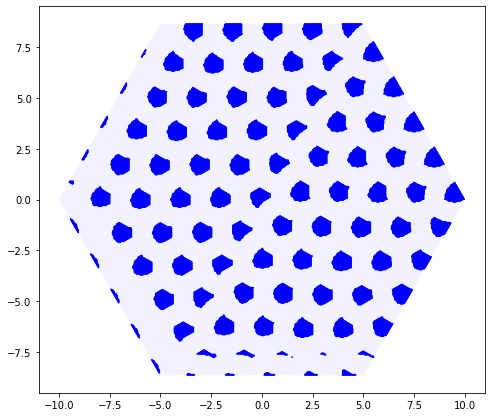

In [66]:
plot_sol(t3, l, sol)